In [52]:
import pandas as pd
import nltk
import os
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn 
plt.style.use('seaborn')

In [5]:
os.chdir('D:/01.ReposGit/Selenium_Sercop/basedatos')

In [9]:
files_cvs=os.listdir()

In [11]:
#unificar 
df=pd.DataFrame()

In [13]:
for i in files_cvs:
    file=pd.read_csv(i)
    df=pd.concat([df,file])

In [16]:
df.head()

,Unnamed: 0,Código Necesidad,Fecha_Public,Provincia,Descripción Necesidad,Status,Fecha limite,EntidadContrato,Dir_Entrega,Contacto
0,0,NIC-1768002080001-2021-40039,2021-09-18 09:07:00,AZUAY - CUENCA,SOLVENTAR DE HERRAMIENTAS Y EQUIPOS MENORES AL...,En Curso,2021-09-22 08:39:00,"Tercera Division de la F.T ""Tarqui""",Calle Hno. Miguel s.n. y Rafael María Arízaga,Funcionario Encargado: Catpt. Novoa Morocho Do...
1,1,NIC-1768080630001-2021-40369,2021-09-17 22:19:00,PICHINCHA - MEJIA,1RA INSISTENCIA CONTRATACIÓN DE SERVICIOS VETE...,En Curso,2021-09-21 22:19:00,Iniap Estacion Experimental Santa Catalina,Panamericana Sur Km.1 Estación Experimental Sa...,Funcionario Encargado: Georgina Mònica Sánchez...
2,2,NIC-1768033550001-2021-40151,2021-09-17 22:18:00,PICHINCHA - QUITO,Adquisición de Vendas de yeso para abastecer a...,En Curso,2021-09-20 22:49:00,HOSPITAL PROVINCIAL GENERAL PABLO ARTURO SUAREZ,Angel Ludeña Oe52-61 y Machala,Funcionario Encargado: Evelyn Caranqui\nEmail:...
3,3,NIC-1768033550001-2021-40155,2021-09-17 22:15:00,PICHINCHA - QUITO,SERVICIO DE MANTENIMIENTO BÁSICO DE INFRAESTRU...,En Curso,2021-09-20 22:16:00,HOSPITAL PROVINCIAL GENERAL PABLO ARTURO SUAREZ,Angel Ludeña Oe52-61 y Machala.,Funcionario Encargado: Evelyn Caranqui\nEmail:...
4,4,NIC-1768080630001-2021-40368,2021-09-17 22:11:00,PICHINCHA - MEJIA,3RA INSISTENCIA ADQUISICION DE PUNTAS PLASTICA...,En Curso,2021-09-21 22:11:00,Iniap Estacion Experimental Santa Catalina,Panamericana Sur Km.1 Estación Experimental Sa...,Funcionario Encargado: Georgina Mònica Sánchez...


In [18]:
df['Ciudad']=df['Provincia'].apply(lambda x: x.split('-')[0])

In [20]:
df['Ciudad'].unique()

array(['AZUAY ', 'PICHINCHA ', 'CARCHI ', 'LOJA ', 'MANABI ', 'GUAYAS ',
       'SANTA ELENA ', 'MORONA SANTIAGO ', 'TUNGURAHUA ', 'SUCUMBIOS ',
       'SANTO DOMINGO DE LOS TSACHILAS ', 'EL ORO ', 'COTOPAXI ',
       'PASTAZA ', 'IMBABURA ', 'ORELLANA ', 'CAÑAR ',
       'ZAMORA CHINCHIPE ', 'ESMERALDAS ', 'LOS RIOS ', 'NAPO ',
       'GALAPAGOS ', 'CHIMBORAZO ', 'BOLIVAR ', ''], dtype=object)

In [21]:
df_text=df

In [22]:
texto=df_text['Descripción Necesidad']

In [24]:
texto=[x.lower() for x in texto]

In [26]:
#texto

### TOKENIZACION DE TEXTO 

In [29]:
#texto
#regex 

pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''

In [34]:
corpus=[nltk.regexp_tokenize(x,pattern) for x in texto]
corpus_flatten=[x for iten in corpus for x in iten]
#corpus_flatten

##  Estadisticas Basicas de palabras

In [38]:
fdist=FreqDist(corpus_flatten)
fdist.most_common(20)

[('de', 7455),
 ('para', 2283),
 ('del', 1494),
 ('y', 1446),
 ('la', 1437),
 ('adquisición', 1225),
 (',', 1016),
 ('el', 993),
 ('.', 776),
 ('servicio', 626),
 ('adquisicion', 553),
 ('mantenimiento', 549),
 ('en', 476),
 ('los', 422),
 ('a', 288),
 ('repuestos', 260),
 ('hospital', 258),
 ('materiales', 257),
 ('las', 238),
 ('contratación', 233)]

## Limpieza Stopwords

In [48]:
stop_words=list(stopwords.words('spanish'))
new_stop=['adquisición', ',', '.', 'contratación', '?', 'adquisicion']
for j in new_stop:
    stop_words.append(j)


texto_limpio=[x for x in corpus_flatten if x not in stop_words]

In [49]:
freq_new=FreqDist(texto_limpio)
freq_new.most_common(20)

[('servicio', 626),
 ('mantenimiento', 549),
 ('repuestos', 260),
 ('hospital', 258),
 ('materiales', 257),
 ('general', 171),
 ('gad', 160),
 ('proyecto', 159),
 ('parenteral', 157),
 ('correctivo', 154),
 ('preventivo', 153),
 ('medicamentos', 149),
 ('equipos', 144),
 ('mg', 144),
 ('centro', 142),
 ('oral', 136),
 ('insumos', 126),
 ('salud', 124),
 ('ml', 120),
 ('"', 120)]

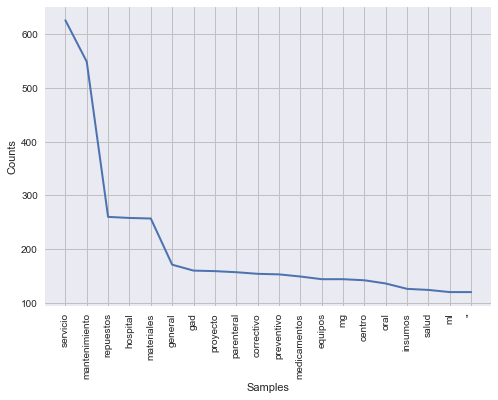

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
freq_new.plot(20)

## Generar Bigramas o Ngramas

In [57]:
from nltk import bigrams
from nltk.util import ngrams
freq_bigrams=list(bigrams(texto_limpio))

In [56]:
freq_stadis=FreqDist(freq_bigrams)
freq_stadis.most_common(20)

[(('servicio', 'mantenimiento'), 175),
 (('mantenimiento', 'preventivo'), 141),
 (('hospital', 'general'), 93),
 (('preventivo', 'correctivo'), 91),
 (('solido', 'oral'), 79),
 (('liquido', 'parenteral'), 78),
 (('mantenimiento', 'correctivo'), 63),
 (('gad', 'municipal'), 59),
 (('dirección', 'distrital'), 54),
 (('repuestos', 'accesorios'), 49),
 (('parque', 'automotor'), 47),
 (('gad', 'parroquial'), 46),
 (('dispositivos', 'médicos'), 46),
 (('medicamentos', 'grupo'), 45),
 (('contratacion', 'servicio'), 42),
 (('líquido', 'parenteral'), 42),
 (('mano', 'obra'), 39),
 (('sólido', 'oral'), 39),
 (('cuerpo', 'bomberos'), 34),
 (('mg', 'ml'), 34)]

In [60]:
#generar trigramas
trigrams=list(ngrams(texto_limpio, 3))
freq_tri=FreqDist(trigrams)
freq_tri.most_common(20)

[(('mantenimiento', 'preventivo', 'correctivo'), 87),
 (('servicio', 'mantenimiento', 'preventivo'), 73),
 (('c', 'c', 'q'), 28),
 (('c', 'q', 'h'), 26),
 (('q', 'h', 'd'), 25),
 (('hospital', 'provincial', 'general'), 24),
 (('h', 'd', 'cotocollao'), 24),
 (('servicio', 'mantenimiento', 'correctivo'), 24),
 (('provincial', 'general', 'pablo'), 23),
 (('compra', 'medicinas', 'compra'), 23),
 (('medicinas', 'compra', 'medicinas'), 23),
 (('general', 'pablo', 'arturo'), 22),
 (('servicio', 'abastecimiento', 'combustible'), 19),
 (('abastecer', 'hospital', 'provincial'), 18),
 (('combustible', 'parque', 'automotor'), 16),
 (('pablo', 'arturo', 'suárez'), 15),
 (('servicio', 'rastreo', 'satelital'), 15),
 (('centro', 'desarrollo', 'infantil'), 14),
 (('centros', 'desarrollo', 'infantil'), 13),
 (('repuestos', 'camioneta', 'chevrolet'), 13)]

## Nube de palabras

In [62]:
#instalar dependencia de grafico
#!pip install wordcloud

In [64]:
text_cloud=" ".join(x for x in texto_limpio)
text_cloud

'solventar herramientas equipos menores gcm iiide gral davalos realizar diferentes trabajos demanda unidad caballería 1ra insistencia servicios veterinarios hato ganadero programa ganadería pastos estación experimental santa cata vendas yeso abastecer hospital provincial general pablo arturo suárez servicio mantenimiento básico infraestructura área medicina interna hospital provincial general pablo arturo suarez 3ra insistencia puntas plasticas programa cereales iniap eesc servicio diagnostico mecanico previo mantenimiento correctivo ambulancia alfa 7 servicio mantenimiento básico infraestructura pediatría hospital provincial general pablo arturo suarez servicio mantenimiento infraestructura área traumatologia hospital provincial general pablo arturo suarez servicio mantenimiento básico infraestructura centro obstetrico hospital provincial general pablo arturo suarez tubos corrugados servicio dotación pasajes aéreos nacionales internacionales servidores públicos gadm cantón puerto lópe

In [65]:
from wordcloud import WordCloud

In [71]:
nube=WordCloud(
    background_color='white',
    max_words=200

)

nube.generate(text_cloud)

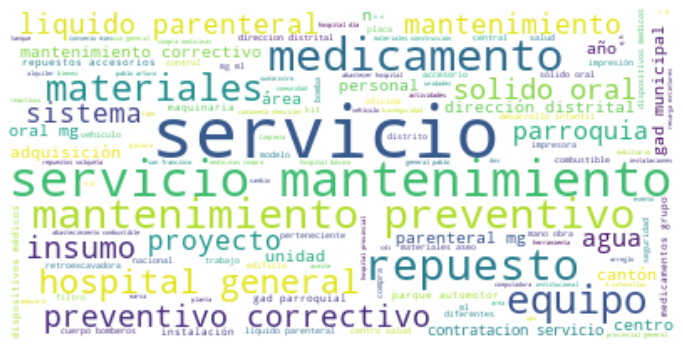

In [72]:
fig=plt.figure(figsize=(12,8))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()